In [3]:
import pandas as pd
import numpy as np
import ipaddress
from ipaddress import ip_address, IPv4Address
import socket
from binascii import hexlify

In [4]:
data = pd.read_csv('./data/16-09-23.csv',low_memory=False)
data = data.fillna(method='bfill')

In [5]:
def strToNumber(numStr):
  num = 0
  for i, c in enumerate(reversed(numStr)):
    num += numStr.index(c) * (len(numStr) ** i)

  return(num)

In [6]:
def chunkMacAddress(mac):
    return mac[0:6]

In [7]:
def validIPAddress(IP: str) -> str:
    try:
        return int(ipaddress.ip_address(IP)) if type(ip_address(IP)) is IPv4Address else int(hexlify(socket.inet_pton(socket.AF_INET6, IP)), 16)
    except ValueError:
        return 0

In [8]:
data.head()

,Time,IP.Source,IP.Destination,MAC.Source,MAC.Destination,Protocol,Source Port,Destination Port,TTL,Length,Win.Size,Info
0,0.000000,192.168.1.120,46.105.38.79,18:b7:9e:02:20:44,14:cc:20:51:33:ea,TCP,40234.0,5228.0,64,54.0,65360.0,"40234 > 5228 [PSH, ACK] Seq=1 Ack=1 Win=6536..."
1,0.000123,192.168.1.120,46.105.38.79,18:b7:9e:02:20:44,14:cc:20:51:33:ea,TCP,40234.0,5228.0,64,54.0,65360.0,[TCP Dup ACK 1#1] 40234 > 5228 [ACK] Seq=5 A...
2,0.065516,52.87.241.159,192.168.1.106,14:cc:20:51:33:ea,30:8c:fb:2f:e4:b2,TCP,443.0,46330.0,224,54.0,963.0,443 > 46330 [ACK] Seq=1 Ack=1 Win=963 Len=0 ...
3,0.125605,192.168.1.196,52.1.40.122,d0:52:a8:00:67:5e,14:cc:20:51:33:ea,TCP,3063.0,443.0,100,54.0,3072.0,3063 > 443 [ACK] Seq=1 Ack=1 Win=3072 Len=1 ...
4,0.138757,195.154.199.173,192.168.1.241,14:cc:20:51:33:ea,70:ee:50:18:34:43,ICMP,5228.0,40234.0,45,54.0,63063.0,"Echo (ping) reply id=0x01b5, seq=1/256, ttl=45"


In [9]:
data.shape

(947072, 12)

In [10]:
data = data.drop_duplicates()

In [11]:
data.Protocol.unique()

array(['TCP', 'ICMP', 'DNS', 'ARP', 'UDPENCAP', 'TLSv1', 'ICMPv6',
       'TLSv1.2', 'UDP', 'SSDP', 'HTTP', 'TPCP', 'HTTP/XML', 'DISTCC ',
       'ESP', 'NTP', 'IGMPv2', 'XMPP/XML', 'STUN', 'BROWSER', 'SIP',
       'DHCP', 'NBNS', 'XID', 'EAPOL', 'Gearman', 'IGMPv3',
       'CLASSIC-STUN', 'MIH', 'GQUIC', 'ICP', 'RSIP', 'ULP', 'HTTP/JSON',
       'WOW', 'DIAMETER', 'DHCPv6', 'TFP over TCP', 'AX4000', 'ISAKMP',
       'TDLS', 'SABP', '? KNXnet/IP', 'TCPCL', 'MDNS', 'IPv6', 'LLMNR',
       'IPv4', 'DB-LSP-DISC/JSON', 'FB_ZERO', 'NAT-PMP', 'DTLSv1.0',
       'SSL', 'MPEG TS', 'X11', 'PKIX-CRL', 'RSL', '0x86dd'], dtype=object)

### Convert IP addresses

In [12]:
data['IP.Source'] = data['IP.Source'].apply(validIPAddress)
data['IP.Destination'] = data['IP.Destination'].apply(validIPAddress)

### Filter out some protocols

In [13]:
data = data[data.Protocol != 'ICMP']
data = data[data.Protocol != 'DNS']
data = data[data.Protocol != 'ICMP']
data = data[data.Protocol != 'ICMPv6']
data = data[data.Protocol != 'DNS']
data = data[data.Protocol != 'TLSv1']
data = data[data.Protocol != 'TFP over TCP']
data = data[data.Protocol != 'DNS']
data = data[data.Protocol != 'DCHP']
data = data[data.Protocol != 'APR']
data = data[data.Protocol != 'TLSv1.1']
data = data[data.Protocol != 'TLSv1.2']
data = data[data.Protocol != 'Config']

In [14]:
data.Protocol.unique()

array(['TCP', 'ARP', 'UDPENCAP', 'UDP', 'SSDP', 'HTTP', 'TPCP',
       'HTTP/XML', 'DISTCC ', 'ESP', 'NTP', 'IGMPv2', 'XMPP/XML', 'STUN',
       'BROWSER', 'SIP', 'DHCP', 'NBNS', 'XID', 'EAPOL', 'Gearman',
       'IGMPv3', 'CLASSIC-STUN', 'MIH', 'GQUIC', 'ICP', 'RSIP', 'ULP',
       'HTTP/JSON', 'WOW', 'DIAMETER', 'DHCPv6', 'AX4000', 'ISAKMP',
       'TDLS', 'SABP', '? KNXnet/IP', 'TCPCL', 'MDNS', 'IPv6', 'LLMNR',
       'IPv4', 'DB-LSP-DISC/JSON', 'FB_ZERO', 'NAT-PMP', 'DTLSv1.0',
       'SSL', 'MPEG TS', 'X11', 'PKIX-CRL', 'RSL', '0x86dd'], dtype=object)

### Convert Protocol

In [15]:
data['Protocol'] = [x.replace('TCP','1') for x in data['Protocol']]
data['Protocol'] = [x.replace('ARP','2') for x in data['Protocol']]
data['Protocol'] = [x.replace('UDPENCAP','3') for x in data['Protocol']]
data['Protocol'] = [x.replace('UDP','4') for x in data['Protocol']]
data['Protocol'] = [x.replace('SSDP','5') for x in data['Protocol']]
data['Protocol'] = [x.replace('NBNS','6') for x in data['Protocol']]
data['Protocol'] = [x.replace('ESP','7') for x in data['Protocol']]
data['Protocol'] = [x.replace('IGMPv2','8') for x in data['Protocol']]
data['Protocol'] = [x.replace('NTP','9') for x in data['Protocol']]
data['Protocol'] = [x.replace('SIP','10') for x in data['Protocol']]
data['Protocol'] = [x.replace('HTTP','11') for x in data['Protocol']]
data['Protocol'] = [x.replace('HTTP/XML','12') for x in data['Protocol']]
data['Protocol'] = [x.replace('11/XML','12') for x in data['Protocol']]
data['Protocol'] = [x.replace('STUN','13') for x in data['Protocol']]
data['Protocol'] = [x.replace('XID','14') for x in data['Protocol']]
data['Protocol'] = [x.replace('EAPOL','15') for x in data['Protocol']]
data['Protocol'] = [x.replace('DHCP','16') for x in data['Protocol']]
data['Protocol'] = [x.replace('ADwin Config','17') for x in data['Protocol']]
data['Protocol'] = [x.replace('BROWSER','18') for x in data['Protocol']]
data['Protocol'] = [x.replace('HTTP/JSON','19') for x in data['Protocol']]
data['Protocol'] = [x.replace('11/JSON','19') for x in data['Protocol']]
data['Protocol'] = [x.replace('CLASSIC-STUN','21') for x in data['Protocol']]
data['Protocol'] = [x.replace('XMPP/XML','22') for x in data['Protocol']]
data['Protocol'] = [x.replace('Gearman','23') for x in data['Protocol']]
data['Protocol'] = [x.replace('IGMPv3','24') for x in data['Protocol']]
data['Protocol'] = [x.replace('SABP','25') for x in data['Protocol']]
data['Protocol'] = [x.replace('GQUIC','26') for x in data['Protocol']]
data['Protocol'] = [x.replace('ISAKMP','27') for x in data['Protocol']]
data['Protocol'] = [x.replace('ULP','28') for x in data['Protocol']]
data['Protocol'] = [x.replace('ASAP','29') for x in data['Protocol']]
data['Protocol'] = [x.replace('DIAMETER','30') for x in data['Protocol']]
data['Protocol'] = [x.replace('WOW','31') for x in data['Protocol']]
data['Protocol'] = [x.replace('DHCPv6','32') for x in data['Protocol']]
data['Protocol'] = [x.replace('AX4000','33') for x in data['Protocol']]
data['Protocol'] = [x.replace('TCPCL','34') for x in data['Protocol']]
data['Protocol'] = [x.replace('DISTCC','35') for x in data['Protocol']]
data['Protocol'] = [x.replace('? KNXnet/IP','36') for x in data['Protocol']]
data['Protocol'] = [x.replace('MIH','37') for x in data['Protocol']]
data['Protocol'] = [x.replace('GSMTAP','38') for x in data['Protocol']]
data['Protocol'] = [x.replace('RSIP','39') for x in data['Protocol']]
data['Protocol'] = [x.replace('MDNS','40') for x in data['Protocol']]
data['Protocol'] = [x.replace('NAT-PMP','41') for x in data['Protocol']]
data['Protocol'] = [x.replace('GRE','42') for x in data['Protocol']]
data['Protocol'] = [x.replace('BFD Control','43') for x in data['Protocol']]

In [16]:
data['Protocol'] = [x.replace('11/XML','12') for x in data['Protocol']]
data['Protocol'] = [x.replace('CLASSIC-13','21') for x in data['Protocol']]
data['Protocol'] = [x.replace('11/JSON','20') for x in data['Protocol']]
data['Protocol'] = [x.replace('16v6','32') for x in data['Protocol']]
data['Protocol'] = [x.replace('1CL','34') for x in data['Protocol']]
data['Protocol'] = [x.replace('R10','39') for x in data['Protocol']]

In [17]:
protocols = data.Protocol.unique()
protocols

array(['1', '2', '3', '4', '5', '11', 'TPCP', '12', '35 ', '7', '9', '8',
       '22', '13', '18', '10', '16', '6', '14', '15', '23', '24', '21',
       '37', '26', 'ICP', '39', '28', '19', '31', '30', '32', '33', '27',
       'TDLS', '25', '36', '34', '40', 'IPv6', 'LLMNR', 'IPv4',
       'DB-LSP-DISC/JSON', 'FB_ZERO', '41', 'DTLSv1.0', 'SSL', 'MPEG TS',
       'X11', 'PKIX-CRL', 'RSL', '0x86dd'], dtype=object)

In [18]:
data['Protocol'] = [x.replace('TPCP','44') for x in data['Protocol']]
data['Protocol'] = [x.replace('TDLS','45') for x in data['Protocol']]
data['Protocol'] = [x.replace('IPv6','46') for x in data['Protocol']]
data['Protocol'] = [x.replace('LLMNR','47') for x in data['Protocol']]
data['Protocol'] = [x.replace('IPv4','48') for x in data['Protocol']]
data['Protocol'] = [x.replace('DB-LSP-DISC/JSON','49') for x in data['Protocol']]
data['Protocol'] = [x.replace('FB_ZERO','50') for x in data['Protocol']]
data['Protocol'] = [x.replace('DTLSv1.0','51') for x in data['Protocol']]
data['Protocol'] = [x.replace('SSL','52') for x in data['Protocol']]
data['Protocol'] = [x.replace('MPEG TS','53') for x in data['Protocol']]
data['Protocol'] = [x.replace('XX1','54') for x in data['Protocol']]
data['Protocol'] = [x.replace('PKIX-CRL','55') for x in data['Protocol']]
data['Protocol'] = [x.replace('RSL','56') for x in data['Protocol']]
data['Protocol'] = [x.replace('0x86dd','56') for x in data['Protocol']]

In [19]:
data.head()

,Time,IP.Source,IP.Destination,MAC.Source,MAC.Destination,Protocol,Source Port,Destination Port,TTL,Length,Win.Size,Info
0,0.000000,3232235896,778643023,18:b7:9e:02:20:44,14:cc:20:51:33:ea,1,40234.0,5228.0,64,54.0,65360.0,"40234 > 5228 [PSH, ACK] Seq=1 Ack=1 Win=6536..."
1,0.000123,3232235896,778643023,18:b7:9e:02:20:44,14:cc:20:51:33:ea,1,40234.0,5228.0,64,54.0,65360.0,[TCP Dup ACK 1#1] 40234 > 5228 [ACK] Seq=5 A...
2,0.065516,878178719,3232235882,14:cc:20:51:33:ea,30:8c:fb:2f:e4:b2,1,443.0,46330.0,224,54.0,963.0,443 > 46330 [ACK] Seq=1 Ack=1 Win=963 Len=0 ...
3,0.125605,3232235972,872491130,d0:52:a8:00:67:5e,14:cc:20:51:33:ea,1,3063.0,443.0,100,54.0,3072.0,3063 > 443 [ACK] Seq=1 Ack=1 Win=3072 Len=1 ...
6,0.298227,778643023,3232235896,14:cc:20:51:33:ea,18:b7:9e:02:20:44,1,5228.0,40234.0,48,9.0,63063.0,"5228 > 40234 [PSH, ACK] Seq=1 Ack=5 Win=6306..."


In [20]:
data['Destination Port'] = pd.to_numeric(data['Destination Port'], errors='coerce').fillna(0)
data['Length'] = pd.to_numeric(data['Length'], errors='coerce').fillna(0)
data['TTL'] = pd.to_numeric(data['TTL'], errors='coerce').fillna(0)
data['Win.Size'] = pd.to_numeric(data['Win.Size'], errors='coerce').fillna(0)

In [21]:
data = data.drop(['Info'], axis=1)

In [22]:
data = data.assign(**{'Device': 0, 'Class': 0})

In [23]:
data.head()

,Time,IP.Source,IP.Destination,MAC.Source,MAC.Destination,Protocol,Source Port,Destination Port,TTL,Length,Win.Size,Device,Class
0,0.000000,3232235896,778643023,18:b7:9e:02:20:44,14:cc:20:51:33:ea,1,40234.0,5228.0,64.0,54.0,65360.0,0,0
1,0.000123,3232235896,778643023,18:b7:9e:02:20:44,14:cc:20:51:33:ea,1,40234.0,5228.0,64.0,54.0,65360.0,0,0
2,0.065516,878178719,3232235882,14:cc:20:51:33:ea,30:8c:fb:2f:e4:b2,1,443.0,46330.0,224.0,54.0,963.0,0,0
3,0.125605,3232235972,872491130,d0:52:a8:00:67:5e,14:cc:20:51:33:ea,1,3063.0,443.0,100.0,54.0,3072.0,0,0
6,0.298227,778643023,3232235896,14:cc:20:51:33:ea,18:b7:9e:02:20:44,1,5228.0,40234.0,48.0,9.0,63063.0,0,0


### Device & Class mapping

In [24]:
column_values = data.columns
column_values
data = data.to_numpy()

In [25]:
for i in range(len(data)):
    if (data[i,3]=="d0:52:a8:00:67:5e"):
        data[i,11]="SmartThings"
        data[i, 12] = 1
    elif(data[i,3]=="44:65:0d:56:cc:d3"):
        data[i, 11] ="amazon echo"
        data[i, 12] = 2
    elif (data[i, 3] == "70:ee:50:18:34:43"):
        data[i, 11] = "Netatmo Welcome"
        data[i, 12] = 3
    elif (data[i, 3] == "f4:f2:6d:93:51:f1"):
        data[i, 11] = "TP-Link Day Night Cloud camera"
        data[i, 12] = 4
    elif (data[i, 3] == "00:16:6c:ab:6b:88"):
        data[i, 11] = "Samsung SmartCam"
        data[i, 12] = 5
    elif (data[i, 3] == "30:8c:fb:2f:e4:b2"):
        data[i, 11] = "Dropcam"
        data[i, 12] = 6
    elif (data[i, 3] == "e8:ab:fa:19:de:4f"):
        data[i, 11] = "Insteon Camera"
        data[i, 12] = 7
    elif (data[i, 3] == "00:24:e4:11:18:a8"):
        data[i, 11] = "Withings Smart Baby Monitor"
        data[i, 12] = 8
    elif (data[i, 3] == "ec:1a:59:79:f4:89"):
        data[i, 11] = "Belkin Wemo switch"
        data[i, 12] = 9
    elif (data[i, 3] == "50:c7:bf:00:56:39"):
        data[i, 11] = "TP-Link Smart plug"
        data[i, 12] = 10
    elif (data[i, 3] == "74:c6:3b:29:d7:1d"):
        data[i, 11] = "iHome"
        data[i, 12] = 11
    elif (data[i, 3] == "ec:1a:59:83:28:11"):
        data[i, 11] = "Belkin wemo motion sensor"
        data[i, 12] = 12
    elif (data[i, 3] == "18:b4:30:25:be:e4"):
        data[i, 11] = "NEST Protect smoke alarm"
        data[i, 12] = 13
    elif (data[i, 3] == "70:ee:50:03:b8:ac"):
        data[i, 11] = "Netatmo weather station"
        data[i, 12] = 14
    elif (data[i, 3] == "00:24:e4:1b:6f:96"):
        data[i, 11] = "Withings Smart scale"
        data[i, 12] = 15
    elif (data[i, 3] == "74:6a:89:00:2e:25"):
        data[i, 11] = "Blipcare Blood Pressure meter"
        data[i, 12] = 16
    elif (data[i, 3] == "00:24:e4:20:28:c6"):
        data[i, 11] = "Withings Aura smart sleep sensor"
        data[i, 12] = 17
    elif (data[i, 3] == "d0:73:d5:01:83:08"):
        data[i, 11] = "Light Bulbs LiFX Smart Bulb"
        data[i, 12] = 18
    elif (data[i, 3] == "18:b7:9e:02:20:44"):
        data[i, 11] = "Triby Speaker"
        data[i, 12] = 19
    elif (data[i, 3] == "e0:76:d0:33:bb:85"):
        data[i, 11] = "PIX-STAR Photo-frame"
        data[i, 12] = 20
    elif (data[i, 3] == "70:5a:0f:e4:9b:c0"):
        data[i, 11] = "HP Printer "
        data[i, 12] = 21
    elif (data[i, 3] == "08:21:ef:3b:fc:e3"):
        data[i, 11] = "Samsung Galaxy Tab"
        data[i, 12] = 22
    elif (data[i, 3] == "30:8c:fb:b6:ea:45"):
        data[i, 11] = "Nest Dropcam"
        data[i, 12] = 23
    elif (data[i, 3] == "40:f3:08:ff:1e:da"):
        data[i, 11] = "Android Phone"
        data[i, 12] = 24
    elif (data[i, 3] == "74:2f:68:81:69:42"):
        data[i, 11] = "Laptop"
        data[i, 12] = 25
    elif (data[i, 3] == "ac:bc:32:d4:6f:2f"):
        data[i, 11] = "MacBook"
        data[i, 12] = 26
    elif (data[i, 3] == "b4:ce:f6:a7:a3:c2"):
        data[i, 11] = "Android Phone"
        data[i, 12] = 24
    elif (data[i, 3] == "d0:a6:37:df:a1:e1"):
        data[i, 11] = "IPhone"
        data[i, 12] = 27
    elif (data[i, 3] == "f4:5c:89:93:cc:85"):
        data[i, 11] = "MacBook/Iphone"
        data[i, 12] = 28
    elif (data[i, 3] == "14:cc:20:51:33:ea"):
        data[i, 11] = "TPLink Router Bridge LAN (Gateway)"
        data[i, 12] = 29
    elif (data[i, 3] == "00:62:6e:51:27:2e"):
        data[i, 11] = "Insteon Camera"
        data[i, 12] = 30
    elif (data[i, 3] == "01:00:5e:7f:ff:fa"):
        data[i, 11] = "ipv4mcast"
        data[i, 12] = 31
    elif (data[i, 3] == "08:21:ef:3b:fc:e3"):
        data[i, 11] = "Samsung SmartCam"
        data[i, 12] = 32
    elif (data[i, 3] == "18:b7:9e:02:20:44"):
        data[i, 11] = "Invoxia"
        data[i, 12] = 33
    elif (data[i, 3] == "18:b4:30:25:be:e4"):
        data[i, 11] = "Nest Protect Smoke Alarm"
        data[i, 12] = 34
    else:
        data[i, 11] = 0
        data[i, 12] = 0

In [26]:
#create list of index
list = np.arange(0, len(data), 1)
# creating the dataframe
df = pd.DataFrame(data=data,index=list,columns=column_values)

### Convert MAC adress to number

In [27]:
df[['MAC.Source']] = df[['MAC.Source']].fillna('30:8c:fb:2f:e4:b2')
df[['MAC.Destination']] = df[['MAC.Destination']].fillna('30:8c:fb:2f:e4:b2')

df['MAC.Source']  = [x.replace(':','') for x in df['MAC.Source'] ]
df['MAC.Destination'] = [x.replace(':','') for x in df['MAC.Destination']]

df['MAC.Source']  = df['MAC.Source'] .apply(chunkMacAddress)
df['MAC.Destination'] = df['MAC.Destination'].apply(chunkMacAddress)

df['MAC.Source']  = df['MAC.Source'] .apply(strToNumber)
df['MAC.Destination'] = df['MAC.Destination'].apply(strToNumber)

In [28]:
df.head()

,Time,IP.Source,IP.Destination,MAC.Source,MAC.Destination,Protocol,Source Port,Destination Port,TTL,Length,Win.Size,Device,Class
0,0.0,3232235896,778643023,1865,1829,1,40234.0,5228.0,64.0,54.0,65360.0,Triby Speaker,19
1,0.000123,3232235896,778643023,1865,1829,1,40234.0,5228.0,64.0,54.0,65360.0,Triby Speaker,19
2,0.065516,878178719,3232235882,1829,1865,1,443.0,46330.0,224.0,54.0,963.0,TPLink Router Bridge LAN (Gateway),29
3,0.125605,3232235972,872491130,1865,1829,1,3063.0,443.0,100.0,54.0,3072.0,SmartThings,1
4,0.298227,778643023,3232235896,1829,1865,1,5228.0,40234.0,48.0,9.0,63063.0,TPLink Router Bridge LAN (Gateway),29


In [29]:
df.shape

(685095, 13)

In [60]:
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
from sklearn.cluster import KMeans

In [32]:
df_short = df.head(int(len(df) * 0.2))

In [33]:
df_short

,Time,IP.Source,IP.Destination,MAC.Source,MAC.Destination,Protocol,Source Port,Destination Port,TTL,Length,Win.Size,Device,Class
0,0.0,3232235896,778643023,1865,1829,1,40234.0,5228.0,64.0,54.0,65360.0,Triby Speaker,19
1,0.000123,3232235896,778643023,1865,1829,1,40234.0,5228.0,64.0,54.0,65360.0,Triby Speaker,19
2,0.065516,878178719,3232235882,1829,1865,1,443.0,46330.0,224.0,54.0,963.0,TPLink Router Bridge LAN (Gateway),29
3,0.125605,3232235972,872491130,1865,1829,1,3063.0,443.0,100.0,54.0,3072.0,SmartThings,1
4,0.298227,778643023,3232235896,1829,1865,1,5228.0,40234.0,48.0,9.0,63063.0,TPLink Router Bridge LAN (Gateway),29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137014,28109.055737,0,0,1865,1829,2,46330.0,443.0,64.0,316.0,2549.0,Samsung Galaxy Tab,22
137015,28110.15788,878178719,3232235882,1829,1865,1,443.0,46330.0,224.0,316.0,963.0,TPLink Router Bridge LAN (Gateway),29
137016,28110.278573,3232235972,872491130,1865,1829,1,3063.0,443.0,100.0,316.0,3072.0,SmartThings,1
137017,28110.48317,872491130,3232235972,1829,1865,1,443.0,3063.0,32.0,316.0,19832.0,TPLink Router Bridge LAN (Gateway),29


In [37]:
features_list = ['TTL','Length','Win.Size','MAC.Source','MAC.Destination']

In [101]:
K=range(8,25)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=int(k),init="k-means++")
    kmeans=kmeans.fit(df_short[features_list])
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [87]:
mycenters = pd.DataFrame({'Number of clusters' : K, 'WSS' : wss})
mycenters

,Number of clusters,WSS
0,8,1.220753e+11
1,9,1.009849e+11
2,10,8.653259e+10
3,11,7.407676e+10
4,12,6.748242e+10
5,13,6.178076e+10
6,14,5.160275e+10
7,15,4.766022e+10
8,16,4.238978e+10
9,17,3.895611e+10


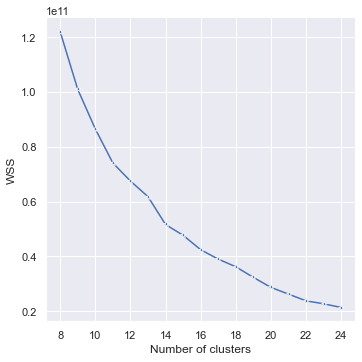

In [102]:
#sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="*")
sns.relplot(x="Number of clusters", y="WSS", sort=False, kind="line",marker="*", legend="auto",data=mycenters)

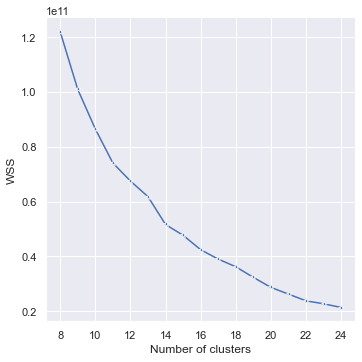

In [103]:
K=range(6,25)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(df_short[features_list])
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)


#sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="*")
sns.relplot(x="Number of clusters", y="WSS", sort=False, kind="line",marker="*", legend="auto",data=mycenters)

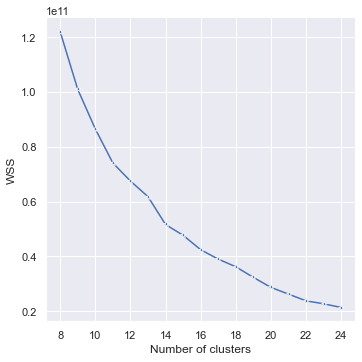

In [104]:
K=range(10,28)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(df_short[features_list])
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)


#sns.scatterplot(x = 'Clusters', y = 'WSS', data = mycenters, marker="*")
sns.relplot(x="Number of clusters", y="WSS", sort=False, kind="line",marker="*", legend="auto",data=mycenters)

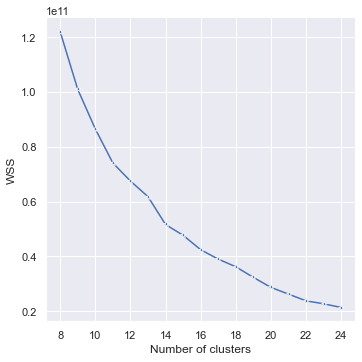

In [105]:
K=range(10,28)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(df_short[features_list])
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

sns.relplot(x="Number of clusters", y="WSS", sort=False, kind="line",marker="*", legend="auto",data=mycenters)

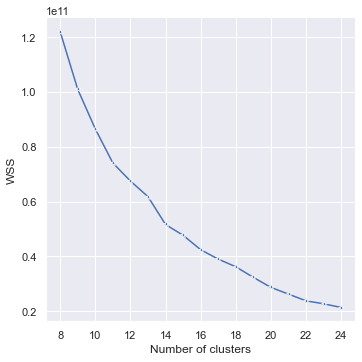

In [108]:
sns.relplot(x="Number of clusters", y="WSS", sort=False, kind="line",marker="*", legend="auto",data=mycenters)

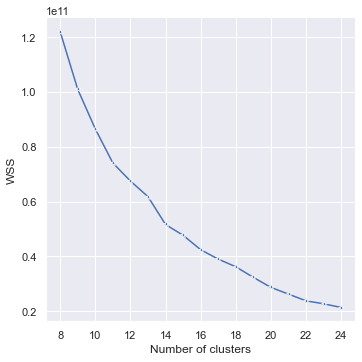

In [109]:
sns.relplot(x="Number of clusters", y="WSS", sort=False, kind="line",marker="*", legend="auto",data=mycenters)